### Bank marketing 18:18
L'obiettivo è predire se il reddito di una persona supera i 50k

In [1]:
import pandas as pd 

df = pd.read_csv('./dataset.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### P1 Q1
Istanze contenute? Dataset completo? Dataset bilanciato?

In [2]:
n_instances = df.index.size
print(f'numero di istanze: {n_instances}')

nan_present = df.isna().any().any()
print(f'Il dataset è completo? {not nan_present}')

balanced_s = df.groupby('income')['age'].count()
print(f'Il dataset è bilanciato?\n{balanced_s}') ## No, non è bilanciato

numero di istanze: 32561
Il dataset è completo? True
Il dataset è bilanciato?
income
<=50K    24720
>50K      7841
Name: age, dtype: int64


In [3]:
df['income'].unique()

<StringArray>
['<=50K', '>50K']
Length: 2, dtype: str

#### P1 Q2
2. Verificare se i lavoratori con laurea e età inferiore a 40 anni hanno una prob maggiore di reddito > 50k rispetto ai lavoratori più anziani <br/>
con lo stesso livello di istruzione

In [4]:
degree_list = ['Bachelors', 'Masters', 'Doctorate']

lavoratori_40_less_mask = (df['education'].isin(degree_list)) & (df['age'] < 40)
lavoratori_40_gt_mask = (df['education'].isin(degree_list)) & (df['age'] > 40)

df2 = df.copy()
df2['income_numeric'] = df2['income'].map({'<=50K' : 0, '>50K': 1})

prob_lss_40 = df2[lavoratori_40_less_mask]['income_numeric'].mean()
prob_gt_40 = df2[lavoratori_40_gt_mask]['income_numeric'].mean()

print(f'Probabilità che < 40 anni prenda > 50K: {prob_lss_40}')
print(f'Probabilità che > 40 anni prenda > 50K: {prob_gt_40}')

Probabilità che < 40 anni prenda > 50K: 0.3437250199840128
Probabilità che > 40 anni prenda > 50K: 0.5914496036240091


#### P1 Q3
3. 

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:

df3 = df.copy()
df3['hours_bins'] = pd.cut(df3['hours.per.week'], bins=[0, 30, 50, 200], right=True)
df3['income_numeric'] = df3['income'].map({'<=50K' : 0, '>50K': 1})

pd.pivot_table(data=df3, index='sex', columns='hours_bins', values='income_numeric', aggfunc='mean')

hours_bins,"(0, 30]","(30, 50]","(50, 200]"
sex,,,
Female,0.060228,0.12024,0.204263
Male,0.074941,0.31406,0.450974


Sì, la riga relativa ai dati degli uomini è sempre > della riga relativa ai dati delle donne.

#### P1 Q4
4.

               mean  median
income                     
<=50K    148.752468     0.0
>50K    4006.142456     0.0


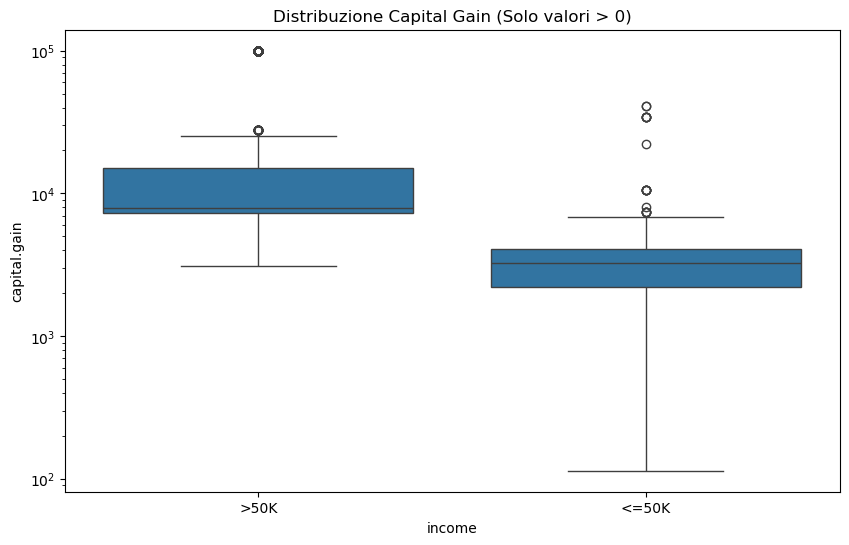

In [76]:
import matplotlib.pyplot as plt 
import seaborn as sns

stats = df.groupby('income')['capital.gain'].agg(['mean', 'median'])
print(stats)

plt.figure(figsize=(10, 6))
plt.title("Distribuzione Capital Gain (Solo valori > 0)")
sns.boxplot(data=df[df['capital.gain'] > 0], x='income', y='capital.gain')
plt.yscale('log') # Opzionale: scala logaritmica se i valori sono molto distanti
plt.show()

### Parte 2

#### P2 Q1
1. 

In [25]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('./dataset.csv', sep=',')

# Il primo non lo comprendo, il secondo non dovrebbe aggiungere informazioni utili
# Il secondo data la numerosità rende meno accurato KneighborsClassifier
drop_columns = ['fnlwgt', 'marital.status', 'native.country'] 

# Elimino le colonne
data = data.drop(columns=drop_columns)

# Elimino le istanze che contengono valori nulli
data = data.dropna(axis=0, how='any')

# Elimino i duplicati
data = data.drop_duplicates()

categorical_cols = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex']

data_transformed = pd.get_dummies(data=data, columns=categorical_cols)

X = data_transformed.drop(columns=['income'])
y = data_transformed['income'].map({'<=50K' : 0, '>50K': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier

etree = ExtraTreeClassifier()
knn = KNeighborsClassifier()
dummy = DummyClassifier()

def fit_predict_score(model, X_train, X_test, y_train, y_test, label):
    print(label)
    model.fit(X_train, y_train)
    print_stats(model, X_train, y_train, 'f1 score e confusion matrix di train')
    print_stats(model, X_test, y_test, 'f1 score e confusion matrix di test')

def print_stats(model, X_test, y_test, label):
    print(label)
    y_pred = model.predict(X_test)
    f1_test = f1_score(y_test, y_pred)
    print(f1_test)
    print(confusion_matrix(y_test, y_pred))
    print()
    
fit_predict_score(knn, X_train, X_test, y_train, y_test, 'KNN Classifier')
fit_predict_score(etree, X_train, X_test, y_train, y_test, 'ExtraTreeClassifier')
fit_predict_score(dummy, X_train, X_test, y_train, y_test, 'Dummy Classifier')

KNN Classifier
f1 score e confusion matrix di train
0.7583892617449665
[[14917   953]
 [ 1495  3842]]

f1 score e confusion matrix di test
0.6321396862977212
[[4758  516]
 [ 727 1068]]

ExtraTreeClassifier
f1 score e confusion matrix di train
0.9640916149068323
[[15870     0]
 [  370  4967]]

f1 score e confusion matrix di test
0.5515669515669516
[[4527  747]
 [ 827  968]]

Dummy Classifier
f1 score e confusion matrix di train
0.0
[[15870     0]
 [ 5337     0]]

f1 score e confusion matrix di test
0.0
[[5274    0]
 [1795    0]]



2.

#### P2 Q2
Verificare, nelle predizioni sul dataset di test ottenute dal classificatore ExtraTreeClassifier, se la probabilità di reddito >50K predetta per gli uomini è diversa da quella predetta per le donne. Valutare se l'accuratezza di predizione ottenuta eliminando la colonna sex è diversa. Cosa si può osservare da questa valutazione?

In [70]:
etree_full = ExtraTreeClassifier(random_state=42)
etree_full.fit(X_train, y_train)
y_pred_full = etree_full.predict(X_test)

mask_male = X_test['sex_Male'] == 1
mask_female = X_test['sex_Female'] == 1

prob_male = y_pred_full[mask_male].mean()
prob_female = y_pred_full[mask_female].mean()

print(f"Probabilità (frequenza) predizione >50K per UOMINI: {prob_male:.2%}")
print(f"Probabilità (frequenza) predizione >50K per DONNE:  {prob_female:.2%}")
print(f"F1 Score (Full): {f1_score(y_test, y_pred_full):.4f}")
print("-" * 30)

Probabilità (frequenza) predizione >50K per UOMINI: 29.23%
Probabilità (frequenza) predizione >50K per DONNE:  11.55%
F1 Score (Full): 0.5426
------------------------------


In [72]:
X_train_unaware = X_train.drop(columns=['sex_Male', 'sex_Female'])
X_test_unaware = X_test.drop(columns=['sex_Male', 'sex_Female'])

etree = ExtraTreeClassifier(random_state=42)
etree.fit(X_train_unaware, y_train)

y_pred_unaware = etree.predict(X_test_unaware)
f1_unaware = f1_score(y_test, y_pred_unaware)

print(f"--- Modello Unaware (Senza Sex) ---")
print(f"F1 Score (Unaware): {f1_unaware:.4f}")

delta = f1_score(y_test, y_pred_full) - f1_unaware
print(f"Differenza F1 Score: {delta:.4f}")

--- Modello Unaware (Senza Sex) ---
F1 Score (Unaware): 0.5624
Differenza F1 Score: -0.0198


Sembra che il sesso sia una informazione rilevante per dedurre il reddito, perchè l'f1 score si è abbassato di .03.

#### P2 Q3
3.

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15]
}

cv5 = GridSearchCV(etree, param_grid=params, scoring='f1').fit(X_train, y_train)

print(f'best params: {cv5.best_params_}')
print(f'f1score: {cv5.best_score_}')

best params: {'criterion': 'gini', 'max_depth': 15}
f1score: 0.5847203853194952


#### P2 Q4
4.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler

preprocessing = ColumnTransformer(transformers=[
    ('discretizer', KBinsDiscretizer(), ['age', 'hours.per.week']),
    ('minmax', MinMaxScaler(), ['capital.gain', 'capital.loss'])
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing), 
    ('model', ExtraTreeClassifier(criterion='gini', max_depth=15))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1}')


f1 score: 0.5852130325814536


/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:396: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


l'f1 score è migliorato di .03 rispetto al punto 1

#### P2 Q5
5.

In [ ]:
from numpy import int64
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessing = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=str)),
    ('scaler',  StandardScaler(), make_column_selector(dtype_include=int64))
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing), 
    ('model', ExtraTreeClassifier(criterion='gini', max_depth=15))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1}')

f1 score: 0.5814458578963698


#### P2 Q6
6.

In [52]:
from sklearn.feature_selection import SelectKBest

preprocessing = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=str)),
    ('scaler',  StandardScaler(), make_column_selector(dtype_include=int64))
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing), 
    ('kbest', SelectKBest()),
    ('model', ExtraTreeClassifier(criterion='gini', max_depth=15))
])

params = {
    'kbest__k': [2, 5, 10, 'all'],
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': [5, 10, 15]
}

cv5 = GridSearchCV(pipeline, param_grid=params, scoring='f1')
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1}')

f1 score: 0.5658374792703151
